In [1]:
import json
import csv
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
# -----------------------------
# Hard-coded CSV / DataFrame column order
# -----------------------------
CSV_COLUMNS = [
    "type",
    "rcvTime",
    "sendTime",
    "sender",
    "senderPseudo",
    "messageID",

    "pos_x", "pos_y", "pos_z",
    "pos_noise_x", "pos_noise_y", "pos_noise_z",

    "spd_x", "spd_y", "spd_z",
    "spd_noise_x", "spd_noise_y", "spd_noise_z",

    "acl_x", "acl_y", "acl_z",
    "acl_noise_x", "acl_noise_y", "acl_noise_z",

    "hed_x", "hed_y", "hed_z",
    "hed_noise_x", "hed_noise_y", "hed_noise_z",
]

In [3]:
def get_scalar(data, key):
    """Safely extract scalar value"""
    return data.get(key, "")


def get_vec(data, key, idx):
    """Safely extract vector element"""
    vec = data.get(key)
    if isinstance(vec, list) and idx < len(vec):
        return vec[idx]
    return ""


def json_to_row(data):
    """Map JSON record to fixed row dict"""
    return {
        "type": get_scalar(data, "type"),
        "rcvTime": get_scalar(data, "rcvTime"),
        "sendTime": get_scalar(data, "sendTime"),
        "sender": get_scalar(data, "sender"),
        "senderPseudo": get_scalar(data, "senderPseudo"),
        "messageID": get_scalar(data, "messageID"),

        "pos_x": get_vec(data, "pos", 0),
        "pos_y": get_vec(data, "pos", 1),
        "pos_z": get_vec(data, "pos", 2),

        "pos_noise_x": get_vec(data, "pos_noise", 0),
        "pos_noise_y": get_vec(data, "pos_noise", 1),
        "pos_noise_z": get_vec(data, "pos_noise", 2),

        "spd_x": get_vec(data, "spd", 0),
        "spd_y": get_vec(data, "spd", 1),
        "spd_z": get_vec(data, "spd", 2),

        "spd_noise_x": get_vec(data, "spd_noise", 0),
        "spd_noise_y": get_vec(data, "spd_noise", 1),
        "spd_noise_z": get_vec(data, "spd_noise", 2),

        "acl_x": get_vec(data, "acl", 0),
        "acl_y": get_vec(data, "acl", 1),
        "acl_z": get_vec(data, "acl", 2),

        "acl_noise_x": get_vec(data, "acl_noise", 0),
        "acl_noise_y": get_vec(data, "acl_noise", 1),
        "acl_noise_z": get_vec(data, "acl_noise", 2),

        "hed_x": get_vec(data, "hed", 0),
        "hed_y": get_vec(data, "hed", 1),
        "hed_z": get_vec(data, "hed", 2),

        "hed_noise_x": get_vec(data, "hed_noise", 0),
        "hed_noise_y": get_vec(data, "hed_noise", 1),
        "hed_noise_z": get_vec(data, "hed_noise", 2),
    }


def jsonl_to_dataframe(input_file, output_csv=None):
    """
    Convert JSONL file to pandas DataFrame.
    Optionally write CSV if output_csv is provided.
    """
    rows = []

    with open(input_file, "r") as fin:
        for line in fin:
            if not line.strip():
                continue
            data = json.loads(line)
            if data["type"] != 2:
                rows.append(json_to_row(data))

    df = pd.DataFrame(rows, columns=CSV_COLUMNS)

    if output_csv:
        df.to_csv(output_csv, index=False)

    return df

In [4]:
df = jsonl_to_dataframe("input2.json")
df

,type,rcvTime,sendTime,sender,senderPseudo,messageID,pos_x,pos_y,pos_z,pos_noise_x,pos_noise_y,pos_noise_z,spd_x,spd_y,spd_z,spd_noise_x,spd_noise_y,spd_noise_z,acl_x,acl_y,acl_z,acl_noise_x,acl_noise_y,acl_noise_z,hed_x,hed_y,hed_z,hed_noise_x,hed_noise_y,hed_noise_z
0,3,28800.053322,28800.053322,21573,1,66778477,1102.191551,950.200199,0.0,3.630557,3.444813,0.0,1.083540,0.324336,0.0,0.000059,0.000022,0.0,1.072935,0.275803,0.0,0.000057,0.000019,0.0,-0.985371,-0.170421,0.0,29.226836,12.684083,0.0
1,3,28800.077003,28800.077003,21567,10215672,66778882,1343.249164,1060.180610,0.0,3.532659,3.625413,0.0,-7.672805,-12.942411,0.0,-0.005124,-0.008642,0.0,0.332144,0.560163,0.0,0.000005,0.000009,0.0,-0.542117,-0.840303,0.0,18.724480,31.715083,0.0
2,3,28800.130440,28800.130440,21531,1,66779090,1110.185773,955.540639,0.0,3.630557,3.444813,0.0,1.088088,0.229351,0.0,0.000057,0.000019,0.0,1.072935,0.275803,0.0,0.000057,0.000019,0.0,-0.986027,-0.166583,0.0,29.226836,12.684083,0.0
3,3,28800.219991,28800.219991,21573,1,66780115,1120.789705,957.292596,0.0,3.785323,3.599578,0.0,1.074396,0.323700,0.0,0.000057,0.000019,0.0,1.072935,0.275803,0.0,0.000057,0.000019,0.0,-0.984654,-0.174516,0.0,31.531020,14.988267,0.0
4,3,28800.297102,28800.297102,21531,1,66780707,1137.640424,960.189474,0.0,3.785323,3.599578,0.0,1.100563,0.263448,0.0,0.000057,0.000019,0.0,1.072935,0.275803,0.0,0.000057,0.000019,0.0,-0.984052,-0.177879,0.0,31.531020,14.988267,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,3,28870.553319,28870.553319,21573,1,67964170,1021.877309,769.558648,0.0,6.193720,5.957883,0.0,-0.315570,-0.494514,0.0,0.000030,0.000041,0.0,-0.318753,-0.481118,0.0,0.000028,0.000040,0.0,-0.660996,-0.750389,0.0,32.557679,39.691246,0.0
1167,3,28870.555744,28870.555744,21303,10213032,67964388,907.819849,483.092777,0.0,3.262959,3.650964,0.0,3.816026,-11.897460,0.0,0.002798,-0.008726,0.0,-0.183221,0.572199,0.0,0.000875,0.000321,0.0,0.262826,-0.964843,0.0,3.802400,18.301461,0.0
1168,3,28870.719993,28870.719993,21573,1,67967338,1019.245128,771.555022,0.0,6.402319,6.166482,0.0,-0.326949,-0.478745,0.0,0.000029,0.000040,0.0,-0.318753,-0.481118,0.0,0.000028,0.000040,0.0,-0.662332,-0.749211,0.0,34.828742,41.962309,0.0
1169,3,28870.724740,28870.724740,21627,10216272,67967527,845.939281,420.876619,0.0,4.115826,4.023941,0.0,-13.730500,-4.714355,0.0,-0.013459,-0.004622,0.0,0.304547,0.104982,0.0,0.000039,0.000207,0.0,-0.964368,-0.264566,0.0,13.173646,5.347364,0.0


In [5]:
#calculate S(j,t) and X(j,t)
spd_cols = [c for c in ["spd_x", "spd_y", "spd_z"] if c in df.columns]
df["speed"] = np.sqrt((df[spd_cols] ** 2).sum(axis=1))
acl_cols = [c for c in ["acl_x", "acl_y", "acl_z"] if c in df.columns]
df["acceleration"] = np.sqrt((df[acl_cols] ** 2).sum(axis=1))

In [6]:
#calculate mu(i,t) and sig(i,t)
df['rcvTime_td'] = pd.to_timedelta(df['rcvTime'], unit='s')
df = df.set_index('rcvTime_td')
df['avg_speed_1s'] = df['speed'].rolling('1s').mean()
df['stddev_speed_1s'] = df['speed'].rolling('1s').std()

In [7]:
#calulate B(j,t)
df = df.sort_values(['sender', 'rcvTime'])
df['msg_count'] = df.groupby('sender').cumcount() + 1
df['elapsed_time'] = (
    df['rcvTime'] - df.groupby('sender')['rcvTime'].transform('first')
)
df['avg_sender_rate'] = df['msg_count'] / df['elapsed_time']
df.loc[df['elapsed_time'] == 0, 'avg_sender_rate'] = 0.0
df = df.drop(columns=['msg_count', 'elapsed_time'])
df = df.sort_values(['sender', 'rcvTime'])

In [8]:
#calculate del(j,t)
group = df.groupby("sender")

df["prev_x"] = group["pos_x"].shift(1)
df["prev_y"] = group["pos_y"].shift(1)
df["prev_z"] = group["pos_z"].shift(1)

df["prev_speed"] = group["speed"].shift(1)
df["prev_acc"] = group["acceleration"].shift(1)
df["prev_time"] = group["rcvTime"].shift(1)
df["dt"] = df["rcvTime"] - df["prev_time"]
df["euclidean_dist"] = np.sqrt(
    (df["pos_x"] - df["prev_x"])**2 +
    (df["pos_y"] - df["prev_y"])**2 +
    (df["pos_z"] - df["prev_z"])**2
)
df["kinematic_dist"] = (
    ((df["prev_speed"] + df["speed"]) / 2) * df["dt"] +
    0.5 * ((df["prev_acc"] + df["acceleration"]) / 2) * df["dt"]**2
)
df["distance_diff"] = df["kinematic_dist"] - df["euclidean_dist"]

<Axes: xlabel='rcvTime_td'>

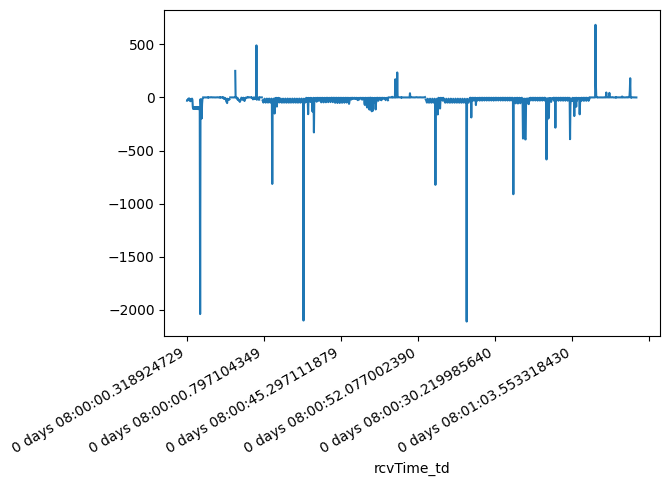

In [9]:
df["distance_diff"].plot()

In [10]:
output = df[["sender", "rcvTime", "avg_sender_rate", "speed", "acceleration", "distance_diff", "avg_speed_1s", "stddev_speed_1s"]]
output.to_csv("output.csv", index=False)
output

,sender,rcvTime,avg_sender_rate,speed,acceleration,distance_diff,avg_speed_1s,stddev_speed_1s
rcvTime_td,,,,,,,,
0 days 08:00:00.318924729,21231,28800.318925,0.000000,0.077383,0.078062,NaN,3.270006,5.784148
0 days 08:00:00.818926980,21231,28800.818927,3.999982,12.517592,0.662248,-30.329359,4.516327,6.022495
0 days 08:00:01.318923558,21231,28801.318924,3.000004,0.076947,0.078062,-30.664230,4.872627,6.162495
0 days 08:00:01.818919565,21231,28801.818920,2.666676,12.528672,0.419552,-19.841408,5.493574,6.282940
0 days 08:00:02.318915993,21231,28802.318916,2.500011,0.075616,0.078062,-19.831439,5.296208,6.295929
...,...,...,...,...,...,...,...,...
0 days 08:00:19.321292867,21639,28819.321293,1.076923,13.839364,0.093151,-0.058044,5.265026,6.389996
0 days 08:00:33.184116306,21657,28833.184116,0.000000,13.359141,0.534709,NaN,5.225804,6.355586
0 days 08:00:34.184123559,21657,28834.184124,1.999985,13.454671,1.136187,0.413259,4.063125,5.825345
